In [26]:
# 處理HTML資料

from bs4 import BeautifulSoup as bs

# 讀取HTML文件
with open("202310月自結盈餘/2880/2880_detail_20231109.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# 解析HTML內容
soup = bs(html_content, "html.parser")

# 找到主要的財報表格
table = soup.find("table", class_="hasBorder")

# 初始化一個空的字典來存儲資料
financial_data = {}

# 提取表格中的行，按順序取得數據
rows = table.find_all("td", {"colspan": "5"})
# 取得內容並顯示
for row in rows:
    print(row.text.strip())

公告本公司112年10月份自結盈餘
1.事實發生日:112/11/09
2.公司名稱:華南金融控股股份有限公司
3.與公司關係(請輸入本公司或子公司):本公司
4.相互持股比例:無
5.發生緣由:公告本公司112年10月份自結盈餘
6.因應措施:無
7.其他應敘明事項(若事件發生或決議之主體係屬公開發行以上公司，本則重大訊息同時
  符合證券交易法施行細則第7條第9款所定對股東權益或證券價格有重大影響之事項):

華南金控本月合併稅前淨利為18.47億元、合併稅後淨利為14.36億元；
累計合併稅前淨利221.12億元、合併稅後淨利為183.29億元，每股稅後盈餘為1.34元，
每股淨值為14.29元。

主要子公司自結合併損益說明如下：
華南銀行本月合併稅前淨利為18.39億元、合併稅後淨利為14.71億元；
累計合併稅前淨利208.17億元、合併稅後淨利為171.07億元，每股稅後盈餘為1.75元，
每股淨值為22.17元。

           華南金融控股公司暨主要子公司112年10月份合併獲利(損失)資料：

　　　　　　　自結合併　自結合併　累計合併　累計合併　累計合併　累計合併
　　　　　　　稅前淨利　稅後淨利　稅前淨利　稅後淨利　每股稅前　每股稅後
                (損)      (損)      (損)      (損)      盈餘      盈餘
　　　　　　　（億元）　（億元）　（億元）　（億元）　 (虧損)    (虧損)
                                                        (元)      (元)
華南金控　　　  18.47　   14.36 　 221.12　  183.29 　  1.62　　  1.34
華南銀行　　　  18.39　　 14.71　  208.17　　171.07 　　2.13　　  1.75
華南永昌證券　   0.57　    0.32 　  14.37　   12.06　　 2.20　　  1.84
華南產險    　   0.66　　  0.47 　   7.95　　  7.08 　  3.97　　  3.54　　　
註1:上述資料均係集團自結合併數字
註2:未適用天災保險準備金之累計合併稅後每股盈餘(虧損)
　　華南金控為

In [38]:
from lxml import etree
import pandas as pd
import re

# 讀取HTML文件
with open("202310月自結盈餘/2880/2880_detail_20231109.html", "r", encoding="utf-8") as file:
    html = file.read()

htm = etree.HTML(html)
data = htm.xpath("//pre/text()")[0]

# 用正則表達式提取表格數據
pattern = re.compile(r'(\S+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')
matches = pattern.findall(data)

# 將匹配結果轉換為 DataFrame
columns = ['公司', '自結稅前淨利(億元)', '自結稅後淨利(億元)', '累計稅前淨利(億元)', '累計稅後淨利(億元)', '每股稅前盈餘(元)', '每股稅後盈餘(元)']
df = pd.DataFrame(matches, columns=columns) #取第一行，第三列.iloc[0, 3] 
df

,公司,自結稅前淨利(億元),自結稅後淨利(億元),累計稅前淨利(億元),累計稅後淨利(億元),每股稅前盈餘(元),每股稅後盈餘(元)
0,華南金控,18.47,14.36,221.12,183.29,1.62,1.34
1,華南銀行,18.39,14.71,208.17,171.07,2.13,1.75
2,華南永昌證券,0.57,0.32,14.37,12.06,2.20,1.84
3,華南產險,0.66,0.47,7.95,7.08,3.97,3.54


In [65]:
import os
from lxml import etree
import pandas as pd
import re
from datetime import datetime, timedelta

# 指定要讀取的資料夾路徑
folder_path = "各金控重訊/2880"

# 用來存放所有提取的數據
all_data = []

# 正則表達式匹配表格數據
pattern = re.compile(r'(\S+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')

# 讀取資料夾內的所有 HTML 檔案，按 filename[-13:-7] 從小到大排序
for filename in sorted(os.listdir(folder_path), key=lambda x: x[-13:-7]):
    if filename.endswith(".html"):
        file_path = os.path.join(folder_path, filename)
        
        with open(file_path, "r", encoding="utf-8") as file:
            html = file.read()
            htm = etree.HTML(html)
            data = htm.xpath("//pre/text()")
            
            if data:
                match_data = pattern.findall(data[0])
                # 將檔案名稱的後 8 位數轉換為年月格式後月份減 1
                date_str = filename[-13:-7]
                try:
                    date_obj = datetime.strptime(date_str, "%Y%m")
                    month_minus_one = (date_obj.replace(month=date_obj.month - 1) if date_obj.month > 1 else date_obj.replace(year=date_obj.year - 1, month=12)).strftime("%Y-%m")
                except ValueError:
                    month_minus_one = "Invalid Date"
                
                match_data_with_filename = [(month_minus_one,) + match for match in match_data]
                all_data.extend(match_data_with_filename)

# 將所有匹配結果轉換為 DataFrame
columns = ['日期', '公司', '自結稅前淨利(億元)', '自結稅後淨利(億元)', '累計稅前淨利(億元)', '累計稅後淨利(億元)', '每股稅前盈餘(元)', '每股稅後盈餘(元)']
df = pd.DataFrame(all_data, columns=columns)
data = df.iloc[::4]
y = data['自結稅後淨利(億元)'].astype(float)

# 計算 2024-10 和 2023-10 間的年增率，及 2024-10 和 2024-09 間的月增率
current_value = y.iloc[-1]  # 2024-10
previous_year_value = y.iloc[-13]  # 2023-10，與當前行相差 12 行
previous_month_value = y.iloc[-2]  # 2024-09，與當前行相差 1 行

# 計算年增率和月增率
yearly_growth = (current_value - previous_year_value) / previous_year_value * 100
monthly_growth = (current_value - previous_month_value) / previous_month_value * 100

print(f"年增率: {yearly_growth:.1f}%")
print(f"月增率: {monthly_growth:.1f}%")

年增率: 21.8%
月增率: 10.3%


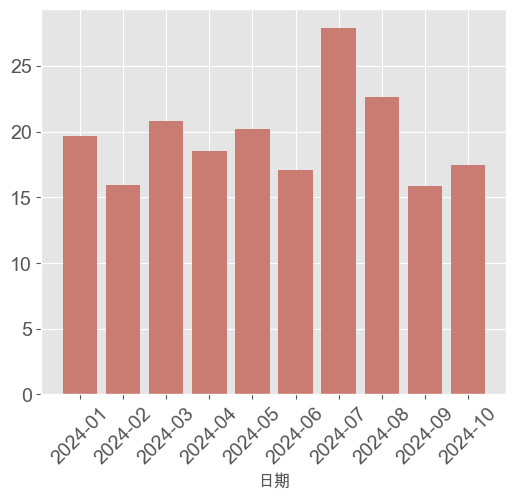

In [74]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 設定字體樣式、配色
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color= ['#a99262', '#1f2f3d', '#9276a5', '#d62728', '#8fd1b9', '#248ae1'])
plt.style.use('ggplot')

# 繪製圖表
plt.figure(figsize=(6, 5))
x = data['日期'].iloc[-10:]
y = data['自結稅後淨利(億元)'].iloc[-10:].astype(float)
plt.bar(x,y, label='每月稅後淨利', color='#cb7c72')

# 設置標題和軸標籤
#plt.title('華南金2024獲利')
plt.xlabel('日期')
plt.xticks(fontsize = 14, rotation=45)
plt.yticks(fontsize = 14)
#plt.ylabel('稅後淨利(億元)')

# 顯示圖例和網格
#plt.legend(loc='upper left')
plt.grid(True)

# 儲存圖表為圖片檔
plt.savefig('2880.png', dpi=300, transparent=True)

# 顯示圖表
plt.show()


In [70]:
df

,日期,公司,自結稅前淨利(億元),自結稅後淨利(億元),累計稅前淨利(億元),累計稅後淨利(億元),每股稅前盈餘(元),每股稅後盈餘(元)
0,2023-10,華南金控,18.47,14.36,221.12,183.29,1.62,1.34
1,2023-10,華南銀行,18.39,14.71,208.17,171.07,2.13,1.75
2,2023-10,華南永昌證券,0.57,0.32,14.37,12.06,2.20,1.84
3,2023-10,華南產險,0.66,0.47,7.95,7.08,3.97,3.54
4,2023-11,華南金控,21.89,18.05,243.01,201.34,1.78,1.48
5,2023-11,華南銀行,19.76,16.20,227.94,187.26,2.33,1.91
6,2023-11,華南永昌證券,1.95,1.77,16.32,13.83,2.49,2.11
7,2023-11,華南產險,1.10,1.02,9.06,8.10,4.53,4.05
8,2023-12,華南金控,19.00,14.92,262.01,216.26,1.92,1.59
9,2023-12,華南銀行,16.90,13.25,244.84,200.52,2.50,2.05
